# EP4130 Quiz 3

# Pradeep Mundlik (AI21BTECH11022)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Question-1

In [51]:
p_value = 2.3e-6
z_score = stats.norm.ppf(1 - p_value)

print(f"The Z-score is {z_score:.2f}")

The Z-score is 4.58


## Question-2

$\Delta \chi^2 $ is distributed with #free params degree of freedoms. Thus, we require $\Delta \chi^2$ such that 

$\Pr(\chi^2 < \Delta \chi^2 , \#\text{free params}) = p\%$

In [52]:
dof = 4
confidence_percentage = 0.80
print(f"The constant countour value is {stats.chi2(dof).ppf(confidence_percentage):.3f}")

The constant countour value is 5.989


## Question-3

In [53]:
# BIC = -2 ln(L) + M ln(N)
N1 = 10
N2 = 10
M1 = 6
M2 = 8

likelihood1 = 1.4 * (N1 - M1)
likelihood2 = 0.7 * (N2 - M2)

def BIC(likelihood , N  , M):
    return -2 * np.log(likelihood) + M * np.log(N)

BIC1 = BIC(likelihood1 , N1 , M1)
BIC2 = BIC(likelihood2 , N2 , M2)

print(f"The difference in BIC is {np.abs(BIC1 - BIC2)}")

The difference in BIC is 7.377758908227872


## Question-4

* $\theta_1$~$\mathcal{U}(-10,5)$, $\theta_2$~$\mathcal{U}(0,20)$  <br>
Prior transform: $\theta_1 * (5 - (-10)) - 10$, $\theta_2 * (20 - 0) + 0$

In [54]:
import dynesty
from dynesty import plotting as dyplot
import dynesty.sampler
import dynesty.sampling

# Define the prior transform function
def prior_transform(u):
    # Transform uniform samples to the prior distributions
    theta1 = -10 + 15 * u[0]  # Uniform prior for theta1 ∈ U[-10, 5]
    theta2 = 20 * u[1]         # Uniform prior for theta2 ∈ U[0, 20]
    
    return [theta1, theta2]

* Assumption about likelihood:

$$ \text{log\_likelihood} \propto (-1)\frac{\theta_1^2 + \theta_2^2}{2}$$

0it [00:00, ?it/s]

693it [00:00, 1872.05it/s, +100 | bound: 5 | nc: 1 | ncall: 4499 | eff(%): 18.027 | loglstar:   -inf < -0.002 <    inf | logz: -4.628 +/-  0.190 | dlogz:  0.001 >  0.109]


--------------------
Results          nlive: 100
         niter: 693
         ncall: array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   2,   1,   1,   2,   2,   1,   2,   1,
         1,   1,   1,   1,   2,   1,   1,   1,   2,   1,   1,   4,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   3,   2,   1,   2,
         2,   2,   2,   2,   5,   2,   1,   1,   2,   1,   1,   2,   2,
         1,   4,   1,   1,   1,   1,   2,   1,   9,   1,   4,   8,   2,
         1,   1,   3,   4,   1,   3,   1,   1,   1,   1,   1,   2,   3,
         3,   2,   3,   7,   1,   3,   2,   2,   6,   1,   4,   6,   3,
         4,   2,   1,   5,   1,   1,   1,   1,   1,   1,   9,   2,   9,
         5,   6,   2,   3,   9,  10,   3,   2,   2,   1,   8,   1,   6,
         9,   3,   3,   5,   1,   5,   8,   1,   6,   5,   8,   1,   2,
         1,   8,   1,   2,   4,   2,   7,   1,   4,   2,   1,   4,   3,
         3,  10,   1,   2,   6,   5,   6,   1,   2,

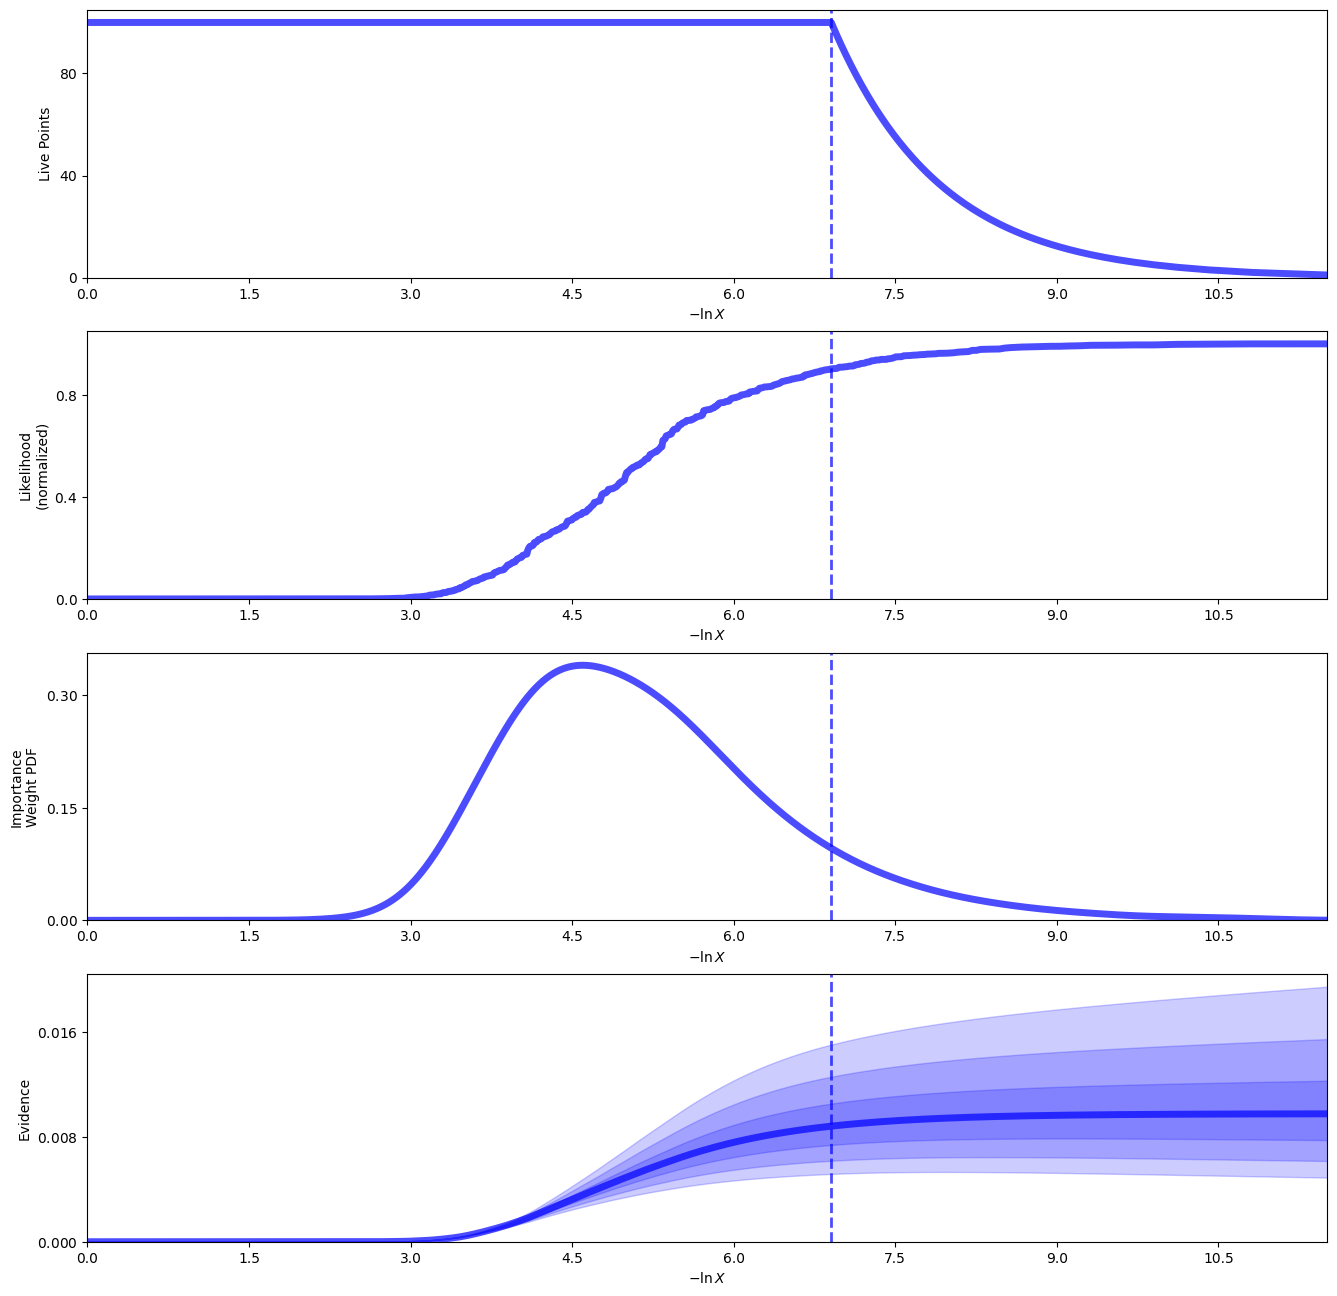

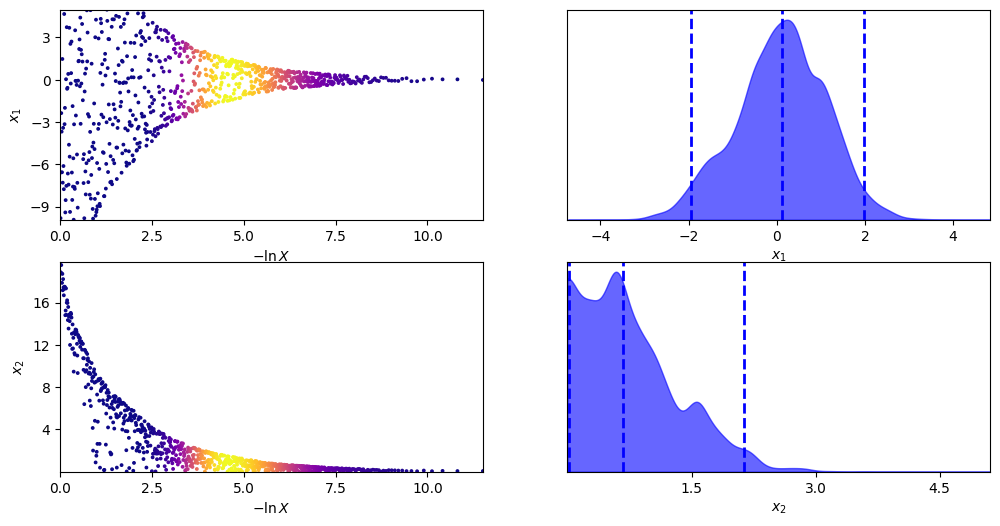

In [55]:
# Here's how we can use the prior transform function

def log_likelihood(theta):
    # Define the log-likelihood function
    return -0.5 * (theta[0]**2 + theta[1]**2)

ndim = 2
nlive = 100

sampler = dynesty.NestedSampler(log_likelihood, prior_transform, ndim, nlive=nlive)

sampler.run_nested()

results = sampler.results
print("--------------------\nResults",results)

fig, axes = dyplot.runplot(sampler.results)
plt.show()
fig, axes = dyplot.traceplot(sampler.results)
plt.show()